In [ ]:
import numpy as np

from tools import create_distances
from tools.grasp_multiprocessing_MAB import multi_GRASP_Bandit
from tools.fine_tuning import contar_soluciones_en_pareto, graficar_boxplots_por_betha, borrar_resultados_hashtag

import multiprocessing
from tqdm import tqdm


In [3]:
archive = "WorkSpace 1000_50_5"
k=5
m=50
context_size=3

In [4]:
max_iterations=5

In [ ]:
alpha=0.3
#betha=0.2
learning_rate=1

In [6]:
create_distances.create_distances(archive)

In [ ]:
def ejecutar_con_pool_betha(archive, k, m, context_size, max_iterations, alpha, learning_rate):
    """
    Ejecuta la función multi_GRASP_Bandit 110 veces en paralelo.

    Las ejecuciones se dividen en 11 grupos de 10. Cada grupo tiene un
    valor de alpha diferente, comenzando en 0.0 para el primer grupo y
    aumentando en 0.1 hasta llegar a 1.0 en el último.

    Args:
        archive: El parámetro 'archive' para multi_GRASP_Bandit.
        k: El parámetro 'k' para multi_GRASP_Bandit.
        m: El parámetro 'm' para multi_GRASP_Bandit.
        context_size: El parámetro 'context_size' para multi_GRASP_Bandit.
        max_iterations: El parámetro 'max_iterations' para multi_GRASP_Bandit.
        betha: El parámetro 'betha' para multi_GRASP_Bandit.
        learning_rate: El parámetro 'learning_rate' para multi_GRASP_Bandit.
    """
    # Genera la lista de 11 valores para alpha, de 0.0 a 1.0
    # np.linspace(0, 1, 11) crea [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    bethas = np.linspace(0, 1, 11)
    
    lista_de_argumentos = []
    corrida_id_counter = 1

    # Itera sobre cada valor de alpha
    for betha_val in bethas:
        # Para cada alpha, crea 20 ejecuciones (corridas)
        for _ in range(20):
            argumentos = (archive, k, m, context_size, max_iterations, alpha, betha_val, learning_rate, corrida_id_counter)
            lista_de_argumentos.append(argumentos)
            corrida_id_counter += 1
            
    # Usa un pool de procesos para ejecutar todas las tareas en paralelo
    with multiprocessing.Pool() as pool:
        # starmap es útil cuando los argumentos de la función son tuplas
        pool.starmap(multi_GRASP_Bandit, lista_de_argumentos)


In [8]:
ruta_borrado=f"Solutions/Multiprocessing/{archive}"
borrar_resultados_hashtag(ruta_borrado)

Buscando archivos con '#' en la carpeta: Solutions/Multiprocessing/WorkSpace 1000_50_5
Eliminado: WorkSpace 1000_50_5_#1.csv
Eliminado: WorkSpace 1000_50_5_#10.csv
Eliminado: WorkSpace 1000_50_5_#100.csv
Eliminado: WorkSpace 1000_50_5_#101.csv
Eliminado: WorkSpace 1000_50_5_#102.csv
Eliminado: WorkSpace 1000_50_5_#103.csv
Eliminado: WorkSpace 1000_50_5_#104.csv
Eliminado: WorkSpace 1000_50_5_#105.csv
Eliminado: WorkSpace 1000_50_5_#106.csv
Eliminado: WorkSpace 1000_50_5_#107.csv
Eliminado: WorkSpace 1000_50_5_#108.csv
Eliminado: WorkSpace 1000_50_5_#109.csv
Eliminado: WorkSpace 1000_50_5_#11.csv
Eliminado: WorkSpace 1000_50_5_#110.csv
Eliminado: WorkSpace 1000_50_5_#111.csv
Eliminado: WorkSpace 1000_50_5_#112.csv
Eliminado: WorkSpace 1000_50_5_#113.csv
Eliminado: WorkSpace 1000_50_5_#114.csv
Eliminado: WorkSpace 1000_50_5_#115.csv
Eliminado: WorkSpace 1000_50_5_#116.csv
Eliminado: WorkSpace 1000_50_5_#117.csv
Eliminado: WorkSpace 1000_50_5_#118.csv
Eliminado: WorkSpace 1000_50_5_#119.c

In [ ]:
for i in tqdm(range(2000), desc="Ejecutando GRASP"):
    ejecutar_con_pool_betha(archive, k, m, context_size, max_iterations, alpha, learning_rate)

Ejecutando GRASP: 100%|██████████| 2000/2000 [3:05:28<00:00,  5.56s/it]  


In [18]:
# Llamar a la función principal (procesará hasta el número 5, aunque solo existan 4)
vector_de_conteos = contar_soluciones_en_pareto(archive, total_corridas=220)

✅ Frente de Pareto cargado desde 'Pareto_front/WorkSpace 1000_50_5.csv'. Contiene 18 soluciones.


In [19]:
np.mean(vector_de_conteos)

np.float64(11.204545454545455)

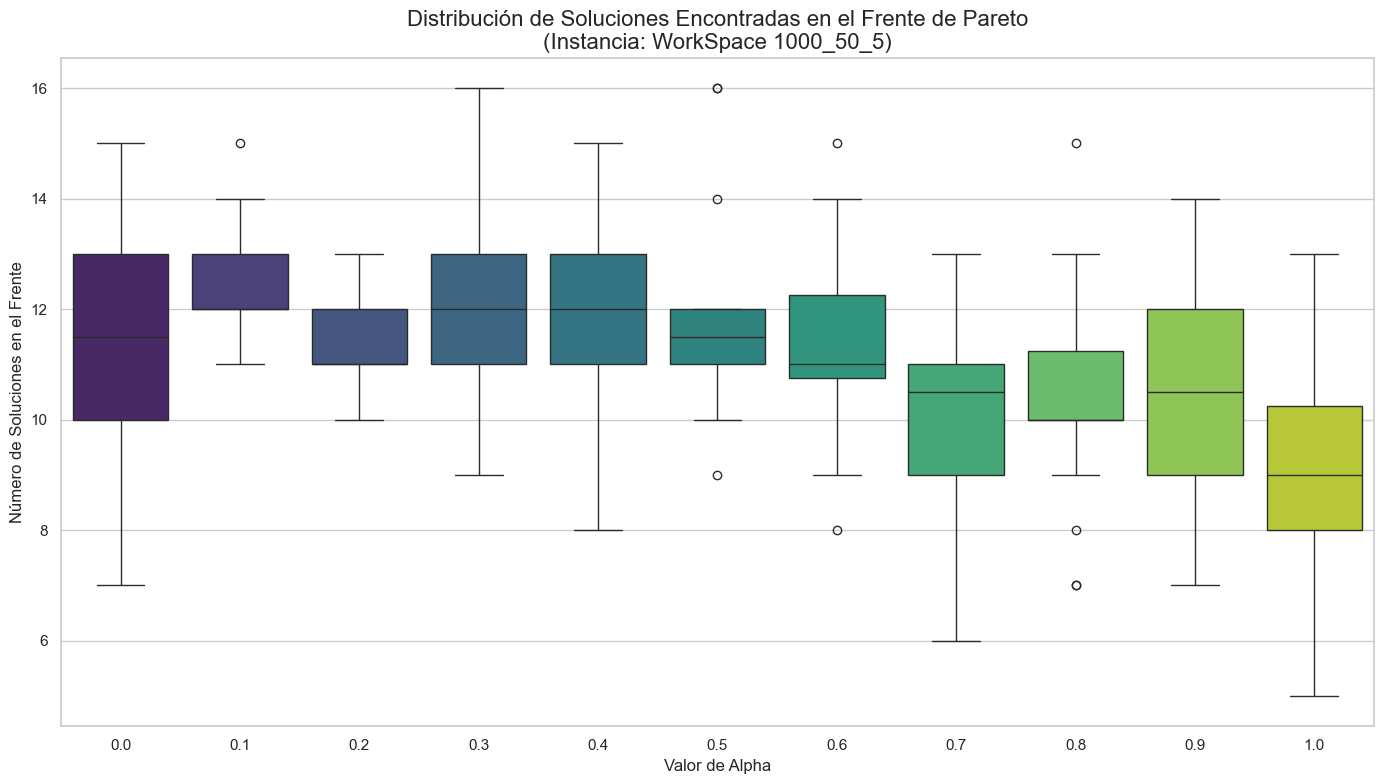

In [20]:
graficar_boxplots_por_alpha(vector_de_conteos, archive)